<a href="https://colab.research.google.com/github/Duku-code/Duku/blob/main/Agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
url = 'https://raw.githubusercontent.com/Duku-code/Duku/main/zoo.csv'
data = pd.read_csv(url)

In [2]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
data['animal_name'].unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal_name, Length: 101, dtype: object>

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances,confusion_matrix, mean_squared_error

In [10]:
features= data.values[:,1:-1]
features.shape

(101, 16)

In [11]:
labels= data["class_type"]
labels.shape

(101,)

<Axes: >

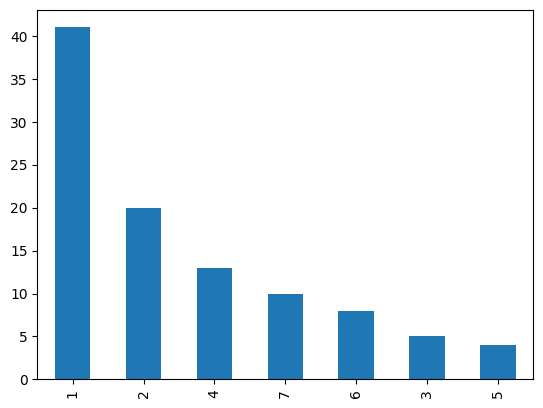

In [17]:
data["class_type"].value_counts()


fig,ax= plt.subplots()
(data["class_type"].value_counts()).plot(ax=ax, kind="bar")

In [12]:
Clusters= AgglomerativeClustering(n_clusters= 7, affinity= "cosine", linkage="average")

Clusters.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [13]:
pred= (Clusters.labels_)+1
print(pred)

[1 1 2 1 1 1 1 2 2 1 1 1 2 7 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 5 1 1 1 3 1 1 1 1 1 1 2
 3 1 2 6 1 1 5 4 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 4 1]


<Axes: >

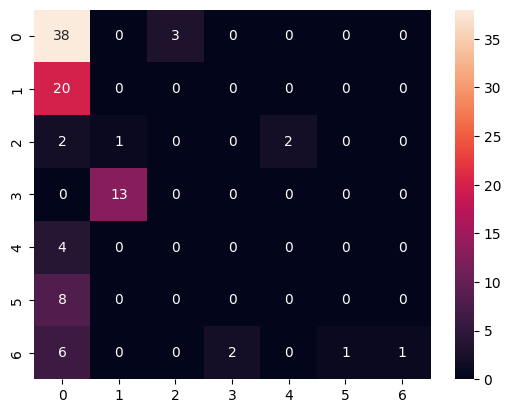

In [14]:
cf= confusion_matrix(labels, pred)
sns.heatmap(cf, annot=True)

In [16]:
MSE= mean_squared_error(labels,pred)
RMSE= np.sqrt(MSE)
print("Root Mean Squared Error is {}".format(RMSE.round(3)))

Root Mean Squared Error is 2.437
